In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing



In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
east = ["New Jersey Nets", "Milwaukee Bucks", "Boston Celtics", "Miami Heat", "Toronto Raptors", "Philadelphia 76ers", "Indiana Pacers", "Brooklyn Nets", "Orlando Magic", "Washington Wizards", "Charlotte Hornets", "Chicago Bulls", "Cleveland Cavaliers", "Detroit Pistons", "Atlanta Hawks" ,"New York Knicks", "Charlotte Bobcats"]
    
west = ["Los Angeles Lakers", "New Orleans Hornets", "Denver Nuggets", "Houston Rockets","LA Clippers", "Los Angeles Clippers", "Utah Jazz", "Dallas Mavericks", "Phoenix Suns", "Minnesota Timberwolves", "Sacramento Kings", "New Orleans Pelicans", "San Antonio Spurs", "Memphis Grizzlies", "Oklahoma City Thunder", "Portland Trail Blazers", "Golden State Warriors"]

stadium_sizes = {"Chicago Bulls":20917, "Cleveland Cavaliers":20562, "Detroit Pistons":20491,"New Jersey Nets" : 20049, "New Orleans Hornets": 16867, "Washington Wizards":20356, "Philadelphia 76ers":20328, "Portland Trail Blazers":19980, "New York Knicks":19812, "Toronto Raptors":19800, "Miami Heat":19600, "Golden State Warriors":19596, "Minnesota Timberwolves":19356, "Dallas Mavericks":19200, "Denver Nuggets":19155, "Charlotte Hornets":19077, "Los Angeles Lakers":19060, "Charlotte Bobcats": 20200, "Los Angeles Clippers":19060, "LA Clippers":19060, "Orlando Magic":18846, "Boston Celtics":18624, "Phoenix Suns":18422, "San Antonio Spurs":18418, "Utah Jazz":18303, "Oklahoma City Thunder":18203, "Memphis Grizzlies":18119, "Atlanta Hawks":18118, "Houston Rockets":18055, "Indiana Pacers":17923, "Brooklyn Nets":17732, "Sacramento Kings":17608, "Milwaukee Bucks":17500, "New Orleans Pelicans":16867}


In [0]:
def awayGamesPlayed(row):
    wins = row['away team wins']
    losses = row['away team losses']
    return int(wins) + int(losses) - 1

def homeGamesPlayed(row):
    wins = row['home team wins']
    losses = row['home team losses']
    return int(wins) + int(losses) - 1

def homePPG(row):
    currPPG = row['home team ppg']
    prevQuant = row['Home Team Games Before Curr Game']
    currPoints = row['home points']
    ppg = ((currPPG*(prevQuant + 1)) - currPoints)/prevQuant
    return ppg

def awayPPG(row):
    currPPG = row['away team ppg']
    prevQuant = row['Away Team Games Before Curr Game']
    currPoints = row['away points']
    ppg = ((currPPG*(prevQuant + 1)) - currPoints)/prevQuant
    return ppg
  
def homeAPG(row):
    currAPG = row['home assists per game']
    prevQuant = row['Home Team Games Before Curr Game']
    currAssists = row['home assists']
    apg = ((currAssists*(prevQuant + 1)) - currAssists)/prevQuant
    return apg
  
def awayAPG(row):
    currAPG = row['away assists per game']
    prevQuant = row['Away Team Games Before Curr Game']
    currAssists = row['away assists']
    apg = ((currAssists*(prevQuant + 1)) - currAssists)/prevQuant
    return apg
  
def homeRPG(row):
    currRPG = row['home rebounds per game']
    prevQuant = row['Home Team Games Before Curr Game']
    currRebounds = row['home rebounds']
    rpg = ((currRebounds*(prevQuant + 1)) - currRebounds)/prevQuant
    return rpg
  
def awayRPG(row):
    currRPG = row['away rebounds per game']
    prevQuant = row['Away Team Games Before Curr Game']
    currRebounds = row['away rebounds']
    rpg = ((currRebounds*(prevQuant + 1)) - currRebounds)/prevQuant
    return rpg
  
def homeTPG(row):
    currTPG = row['home turnovers per game']
    prevQuant = row['Home Team Games Before Curr Game']
    currTurnovers = row['home turnovers']
    tpg = ((currTurnovers*(prevQuant + 1)) - currTurnovers)/prevQuant
    return tpg
  
def awayTPG(row):
    currTPG = row['away turnovers per game']
    prevQuant = row['Away Team Games Before Curr Game']
    currTurnovers = row['away turnovers']
    tpg = ((currTurnovers*(prevQuant + 1)) - currTurnovers)/prevQuant
    return tpg

def homeTeamWon(row):
    home = int(row['home points'])
    away = int(row['away points'])
    if home > away:
        return 1
    else: return 0 
    
def homeTeamPercentage(row):
    currPercentage = float(row['home team win pct'])
    prevQuant = row['Home Team Games Before Curr Game']
    didHomeWin = row['Home Team Won']
    return float(((currPercentage * (prevQuant + 1)) - didHomeWin)/(prevQuant + 1))

def awayTeamPercentage(row):
    currPercentage = float(row['away team win pct'])
    prevQuant = row['Away Team Games Before Curr Game']
    didAwayWin = 1 - row['Home Team Won']
    return float(((currPercentage * (prevQuant + 1)) - didAwayWin)/(prevQuant + 1))

def homeTeamWinLast(row):
    homeTeam = row['home team']
    winTeam = row['last game winner']
    if homeTeam == winTeam:
        return 1
    else: return 0

def sameConference(row):
    homeTeam = row['home team']
    awayTeam = row['away team']
    if homeTeam not in east and homeTeam not in west:
        print(homeTeam)
    if awayTeam not in east and awayTeam not in west:
        print(awayTeam)
    if homeTeam in east and awayTeam in east:
        return 1
    elif homeTeam in west and awayTeam in west:
        return 1
    else:
        return 0
    
def stadiumSize(row):
    homeTeam = row['home team']
    if homeTeam not in stadium_sizes:
        print(homeTeam)
    else:
        return(stadium_sizes[homeTeam])

In [5]:
df = pd.read_csv('/content/drive/My Drive/games_2009_to_2019_updated_4.csv')
# df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'result(away-home)', "last game's id", "away team record", "home team record", "point differential"], axis = 1)
# Data preprocessing kinda blows 
# Fields I want:
# Home Team Points Per Game "NOT INCLUDING CURRENT GAME"
## Dependent on Current Points Per Game, Amount of Games Played before this, and Points in Current Game
## Same for Away Team
df['Home Team Games Before Curr Game'] = df.apply(lambda row: homeGamesPlayed(row), axis = 1)
df['Away Team Games Before Curr Game'] = df.apply(lambda row: awayGamesPlayed(row), axis = 1)
df = df[df['Home Team Games Before Curr Game'] != 0]
df = df[df['Away Team Games Before Curr Game'] != 0]
# df = df[df['playoff game'] == 1 ]
df

,Unnamed: 0,Unnamed: 0.1,away team,away team record,home team,home team record,last game's id,result(away-home),playoff game,winning team,away team wins,away team losses,away team win pct,home team wins,home team losses,home team win pct,point differential,away points,home points,last game winner,away team ppg,home team ppg,away assists,home assists,away rebounds,home rebounds,away turnovers,home turnovers,away assists per game,home assists per game,away rebounds per game,home rebounds per game,away turnovers per game,home turnovers per game,Home Team Games Before Curr Game,Away Team Games Before Curr Game
0,0,20800473,Miami Heat,17-14,Orlando Magic,26-7,10800073,76-86,0,Orlando Magic,17,14,0.548387,26,7,0.787879,10,76,86,NaN,76.000000,86.000000,15,19,41,54,12,14,15,19.00,41,54.00,12,14.00,32,30
1,1,20800474,Houston Rockets,21-13,Toronto Raptors,13-20,20700440,73-94,0,Toronto Raptors,21,13,0.617647,13,20,0.393939,21,73,94,NaN,73.000000,94.000000,19,20,46,40,21,14,19,20.00,46,40.00,21,14.00,32,33
2,2,20800475,Washington Wizards,6-25,Boston Celtics,29-5,20800323,83-108,0,Boston Celtics,6,25,0.193548,29,5,0.852941,25,83,108,NaN,83.000000,108.000000,22,31,35,47,8,18,22,31.00,35,47.00,8,18.00,33,30
3,3,20800476,Chicago Bulls,14-19,Cleveland Cavaliers,27-5,20800082,92-117,0,Cleveland Cavaliers,14,19,0.424242,27,5,0.843750,25,92,117,NaN,92.000000,117.000000,16,25,42,51,16,15,16,25.00,42,51.00,16,15.00,31,32
4,4,20800477,Atlanta Hawks,21-11,New Jersey Nets,16-17,20800133,91-93,0,New Jersey Nets,21,11,0.656250,16,17,0.484848,2,91,93,NaN,91.000000,93.000000,24,24,42,52,16,18,24,24.00,42,52.00,16,18.00,32,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13902,13902,21900170,Utah Jazz,8-4,Memphis Grizzlies,5-7,21800982,106-107,0,Memphis Grizzlies,8,4,0.666667,5,7,0.416667,1,106,107,Memphis Grizzlies,104.666667,109.750000,17,25,45,46,14,11,17,19.00,45,43.00,14,13.00,11,11
13903,13903,21900171,Washington Wizards,3-7,Minnesota Timberwolves,7-5,21900080,137-116,0,Washington Wizards,3,7,0.300000,7,5,0.583333,21,137,116,Minnesota Timberwolves,117.700000,117.083333,38,26,51,43,13,20,38,25.75,51,43.75,13,16.75,11,9
13904,13904,21900172,Philadelphia 76ers,7-5,Oklahoma City Thunder,5-7,21800927,119-127,0,Oklahoma City Thunder,7,5,0.583333,5,7,0.416667,8,119,127,Philadelphia 76ers,109.416667,107.083333,24,22,43,36,14,13,24,22.90,43,43.80,14,13.50,11,11
13905,13905,21900173,Boston Celtics,10-1,Golden State Warriors,2-11,21800964,105-100,0,Boston Celtics,10,1,0.909091,2,11,0.153846,5,105,100,Boston Celtics,115.090909,109.461538,24,17,47,55,14,19,24,23.00,47,47.50,14,15.50,12,10


In [0]:
df['Home Prev PPG'] = df.apply(lambda row: homePPG(row), axis = 1)
df['Away Prev PPG'] = df.apply(lambda row: awayPPG(row), axis = 1)

df['Home Prev APG'] = df.apply(lambda row: homeAPG(row), axis = 1)
df['Away Prev APG'] = df.apply(lambda row: awayAPG(row), axis = 1)

df['Home Prev RPG'] = df.apply(lambda row: homeRPG(row), axis = 1)
df['Away Prev RPG'] = df.apply(lambda row: awayRPG(row), axis = 1)

df['Home Prev TPG'] = df.apply(lambda row: homeTPG(row), axis = 1)
df['Away Prev TPG'] = df.apply(lambda row: awayTPG(row), axis = 1)

# If the home team has this points per game record, and the away team has this 
# much of a points per game record, will the home team win? 
# I need to add a field for home team winning or not.
df['Home Team Won'] = df.apply(lambda row: homeTeamWon(row), axis = 1)
# I should also have a field of the Away Team Win Percentage BEFORE the current game, and one for Home as well
df['Home Prev Win Percentage'] = df.apply(lambda row: homeTeamPercentage(row), axis = 1)
df['Away Prev Win Percentage'] = df.apply(lambda row: awayTeamPercentage(row), axis = 1)
# df = df.drop(['away team', 'home team', 'playoff game', 'winning team', 'away team wins', 'home team wins', 'away team losses', 'home team losses'], axis = 1)
# df = df.drop(['away team win pct', 'home team win pct', 'home points', 'away points', 'home team ppg', 'away team ppg'], axis = 1)
df = df[df['Home Prev Win Percentage'] != 0]
df = df[df['Away Prev Win Percentage'] != 0]
df = df.drop(['Home Team Games Before Curr Game', 'Away Team Games Before Curr Game'], axis = 1)
#

In [7]:
df = df[pd.isna(df['last game winner']) == False]
# Add if last game was won by home or not
# Stadium Size of Home Team
# If Away is in same conference
df['Home Won Last Game'] = df.apply(lambda row: homeTeamWinLast(row), axis = 1)
df = df.drop(['last game winner', 'winning team', 'away team wins', 'home team wins', 'away team losses', 'home team losses'], axis = 1)
df['Same Conference'] = df.apply(lambda row: sameConference(row), axis = 1)
df['Stadium Size'] = df.apply(lambda row: stadiumSize(row), axis = 1)
# df.drop(['away team', 'home team', 'Home Team Won', 'Home Prev PPG', 'Away Prev PPG', 'Home Won Last Game', 'Stadium Size'], axis = 1).head()
df

,Unnamed: 0,Unnamed: 0.1,away team,away team record,home team,home team record,last game's id,result(away-home),playoff game,away team win pct,home team win pct,point differential,away points,home points,away team ppg,home team ppg,away assists,home assists,away rebounds,home rebounds,away turnovers,home turnovers,away assists per game,home assists per game,away rebounds per game,home rebounds per game,away turnovers per game,home turnovers per game,Home Prev PPG,Away Prev PPG,Home Prev APG,Away Prev APG,Home Prev RPG,Away Prev RPG,Home Prev TPG,Away Prev TPG,Home Team Won,Home Prev Win Percentage,Away Prev Win Percentage,Home Won Last Game,Same Conference,Stadium Size
16,16,20800489,Milwaukee Bucks,16-19,Charlotte Bobcats,12-22,20800484,92-102,0,0.457143,0.352941,10,92,102,97.500000,88.500000,15,22,35,32,17,15,15,22.00,35,32.00,17,15.00,88.090909,97.661765,22.0,15.0,32.0,35.0,15.0,17.0,1,0.323529,0.457143,0,1,20200
55,55,20800528,Atlanta Hawks,22-13,Orlando Magic,29-8,20800514,87-121,0,0.628571,0.783784,34,87,121,95.750000,100.800000,16,28,38,54,10,11,16,28.00,38,54.00,10,11.00,100.238889,96.007353,28.0,16.0,54.0,38.0,11.0,10.0,1,0.756757,0.628571,1,1,18846
75,75,20800548,Phoenix Suns,21-13,Los Angeles Clippers,8-29,20800485,109-103,0,0.617647,0.216216,6,109,103,113.250000,92.333333,28,26,41,42,15,16,28,23.00,41,41.00,15,15.00,92.037037,113.378788,26.0,28.0,42.0,41.0,16.0,15.0,0,0.216216,0.588235,0,1,19060
81,81,20800554,Toronto Raptors,16-23,Boston Celtics,31-9,20800546,109-115,0,0.410256,0.775000,6,109,115,99.714286,97.000000,20,26,37,46,11,12,20,26.00,37,46.00,11,12.00,96.538462,99.469925,26.0,20.0,46.0,37.0,12.0,11.0,1,0.750000,0.410256,1,1,18624
105,105,20800578,Cleveland Cavaliers,30-7,Chicago Bulls,18-22,20800476,93-102,0,0.810811,0.450000,9,93,102,99.666667,97.250000,16,22,44,43,16,14,16,22.00,44,43.00,16,14.00,97.128205,99.851852,22.0,16.0,43.0,44.0,14.0,16.0,1,0.425000,0.810811,0,1,20917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13902,13902,21900170,Utah Jazz,8-4,Memphis Grizzlies,5-7,21800982,106-107,0,0.666667,0.416667,1,106,107,104.666667,109.750000,17,25,45,46,14,11,17,19.00,45,43.00,14,13.00,110.000000,104.545455,25.0,17.0,46.0,45.0,11.0,14.0,1,0.333333,0.666667,1,1,18119
13903,13903,21900171,Washington Wizards,3-7,Minnesota Timberwolves,7-5,21900080,137-116,0,0.300000,0.583333,21,137,116,117.700000,117.083333,38,26,51,43,13,20,38,25.75,51,43.75,13,16.75,117.181818,115.555556,26.0,38.0,43.0,51.0,20.0,13.0,0,0.583333,0.200000,1,0,19356
13904,13904,21900172,Philadelphia 76ers,7-5,Oklahoma City Thunder,5-7,21800927,119-127,0,0.583333,0.416667,8,119,127,109.416667,107.083333,24,22,43,36,14,13,24,22.90,43,43.80,14,13.50,105.272727,108.545455,22.0,24.0,36.0,43.0,13.0,14.0,1,0.333333,0.583333,0,0,18203
13905,13905,21900173,Boston Celtics,10-1,Golden State Warriors,2-11,21800964,105-100,0,0.909091,0.153846,5,105,100,115.090909,109.461538,24,17,47,55,14,19,24,23.00,47,47.50,14,15.50,110.250000,116.100000,17.0,24.0,55.0,47.0,19.0,14.0,0,0.153846,0.818182,0,0,19596


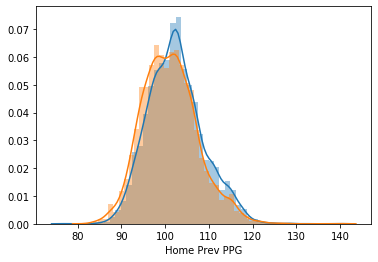

In [8]:
df1 = df[df['Home Team Won'] == 1]
df2 = df[df['Home Team Won'] == 0]

sns.distplot(df1['Home Prev PPG'])
sns.distplot(df2['Home Prev PPG'])


In [0]:
df.to_csv(r'idiot.csv')


In [10]:
df['Home Team Won'].value_counts()

1    7002
0    4856
Name: Home Team Won, dtype: int64

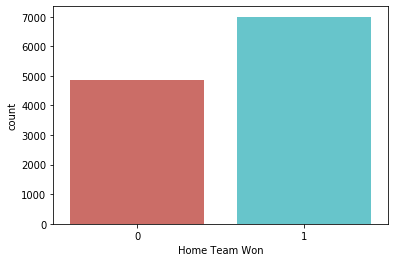

<Figure size 432x288 with 0 Axes>

In [11]:
sns.countplot(x = 'Home Team Won', data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [12]:
count_home_lost = len(df[df['Home Team Won'] == 0])
count_home_won = len(df[df['Home Team Won'] == 1])
pct_lost = (count_home_lost)/(count_home_lost + count_home_won)
print("Percentage Home Team Lost: ", pct_lost)
pct_won = (count_home_won)/(count_home_lost + count_home_won)
print("Percentage Home Team Won: ", pct_won)


Percentage Home Team Lost:  0.4095125653567212
Percentage Home Team Won:  0.5904874346432788


In [0]:
scale = preprocessing.MinMaxScaler()

newHomePPG = df['Home Prev PPG'].values.astype(float)
scaledNewHomePPG = scale.fit_transform(newHomePPG.reshape(-1,1))
df['Scaled Home Prev PPG'] = scaledNewHomePPG

newAwayPPG = df['Away Prev PPG'].values.astype(float)
scaledNewAwayPPG = scale.fit_transform(newAwayPPG.reshape(-1,1))
df['Scaled Away Prev PPG'] = scaledNewAwayPPG

newHomeAPG = df['Home Prev APG'].values.astype(float)
scaledNewHomeAPG = scale.fit_transform(newHomeAPG.reshape(-1,1))
df['Scaled Home Prev APG'] = scaledNewHomeAPG

newAwayAPG = df['Away Prev APG'].values.astype(float)
scaledNewAwayAPG = scale.fit_transform(newAwayAPG.reshape(-1,1))
df['Scaled Away Prev APG'] = scaledNewAwayAPG

newHomeRPG = df['Home Prev RPG'].values.astype(float)
scaledNewHomeRPG = scale.fit_transform(newHomeRPG.reshape(-1,1))
df['Scaled Home Prev RPG'] = scaledNewHomeRPG

newAwayRPG = df['Away Prev RPG'].values.astype(float)
scaledNewAwayRPG = scale.fit_transform(newAwayRPG.reshape(-1,1))
df['Scaled Away Prev RPG'] = scaledNewAwayRPG

newHomeTPG = df['Home Prev TPG'].values.astype(float)
scaledNewHomeTPG = scale.fit_transform(newHomeTPG.reshape(-1,1))
df['Scaled Home Prev TPG'] = scaledNewHomeTPG

newAwayTPG = df['Away Prev TPG'].values.astype(float)
scaledNewAwayTPG = scale.fit_transform(newAwayTPG.reshape(-1,1))
df['Scaled Away Prev TPG'] = scaledNewAwayTPG

newStadiumSize = df['Stadium Size'].values.astype(float)
scaledStadium = scale.fit_transform(newStadiumSize.reshape(-1,1))
df['Scaled Stadium Size'] = scaledStadium

In [14]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,away team,away team record,home team,home team record,last game's id,result(away-home),playoff game,away team win pct,home team win pct,point differential,away points,home points,away team ppg,home team ppg,away assists,home assists,away rebounds,home rebounds,away turnovers,home turnovers,away assists per game,home assists per game,away rebounds per game,home rebounds per game,away turnovers per game,home turnovers per game,Home Prev PPG,Away Prev PPG,Home Prev APG,Away Prev APG,Home Prev RPG,Away Prev RPG,Home Prev TPG,Away Prev TPG,Home Team Won,Home Prev Win Percentage,Away Prev Win Percentage,Home Won Last Game,Same Conference,Stadium Size,Scaled Home Prev PPG,Scaled Away Prev PPG,Scaled Home Prev APG,Scaled Away Prev APG,Scaled Home Prev RPG,Scaled Away Prev RPG,Scaled Home Prev TPG,Scaled Away Prev TPG,Scaled Stadium Size
16,16,20800489,Milwaukee Bucks,16-19,Charlotte Bobcats,12-22,20800484,92-102,0,0.457143,0.352941,10,92,102,97.500000,88.500000,15,22,35,32,17,15,15,22.0,35,32.0,17,15.0,88.090909,97.661765,22.0,15.0,32.0,35.0,15.0,17.0,1,0.323529,0.457143,0,1,20200,0.171663,0.369029,0.468085,0.326087,0.444444,0.432099,0.517241,0.607143,0.822963
55,55,20800528,Atlanta Hawks,22-13,Orlando Magic,29-8,20800514,87-121,0,0.628571,0.783784,34,87,121,95.750000,100.800000,16,28,38,54,10,11,16,28.0,38,54.0,10,11.0,100.238889,96.007353,28.0,16.0,54.0,38.0,11.0,10.0,1,0.756757,0.628571,1,1,18846,0.365514,0.335719,0.595745,0.347826,0.750000,0.469136,0.379310,0.357143,0.488642
75,75,20800548,Phoenix Suns,21-13,Los Angeles Clippers,8-29,20800485,109-103,0,0.617647,0.216216,6,109,103,113.250000,92.333333,28,26,41,42,15,16,28,23.0,41,41.0,15,15.0,92.037037,113.378788,26.0,28.0,42.0,41.0,16.0,15.0,0,0.216216,0.588235,0,1,19060,0.234634,0.685479,0.553191,0.608696,0.583333,0.506173,0.551724,0.535714,0.541481
81,81,20800554,Toronto Raptors,16-23,Boston Celtics,31-9,20800546,109-115,0,0.410256,0.775000,6,109,115,99.714286,97.000000,20,26,37,46,11,12,20,26.0,37,46.0,11,12.0,96.538462,99.469925,26.0,20.0,46.0,37.0,12.0,11.0,1,0.750000,0.410256,1,1,18624,0.306465,0.405435,0.553191,0.434783,0.638889,0.456790,0.413793,0.392857,0.433827
105,105,20800578,Cleveland Cavaliers,30-7,Chicago Bulls,18-22,20800476,93-102,0,0.810811,0.450000,9,93,102,99.666667,97.250000,16,22,44,43,16,14,16,22.0,44,43.0,16,14.0,97.128205,99.851852,22.0,16.0,43.0,44.0,14.0,16.0,1,0.425000,0.810811,0,1,20917,0.315876,0.413125,0.468085,0.347826,0.597222,0.543210,0.482759,0.571429,1.000000


In [15]:
cols = ['Scaled Home Prev PPG','Scaled Away Prev PPG', 'Home Prev Win Percentage', 'Away Prev Win Percentage', 'Home Won Last Game' , 'Same Conference' , 'Scaled Stadium Size', 'Scaled Home Prev APG','Scaled Away Prev APG', 'Scaled Home Prev RPG','Scaled Away Prev RPG', 'Scaled Home Prev TPG','Scaled Away Prev TPG',]
# cols = 'Home Prev Win Percentage', 'Away Prev Win Percentage', 'Home Won Last Game' , 'Same Conference' }
# cols = ['Home Prev Win Percentage', 'Away Prev Win Percentage', 'Same Conference' ]

x = df[cols]
y = df['Home Team Won']
x

,Scaled Home Prev PPG,Scaled Away Prev PPG,Home Prev Win Percentage,Away Prev Win Percentage,Home Won Last Game,Same Conference,Scaled Stadium Size,Scaled Home Prev APG,Scaled Away Prev APG,Scaled Home Prev RPG,Scaled Away Prev RPG,Scaled Home Prev TPG,Scaled Away Prev TPG
16,0.171663,0.369029,0.323529,0.457143,0,1,0.822963,0.468085,0.326087,0.444444,0.432099,0.517241,0.607143
55,0.365514,0.335719,0.756757,0.628571,1,1,0.488642,0.595745,0.347826,0.750000,0.469136,0.379310,0.357143
75,0.234634,0.685479,0.216216,0.588235,0,1,0.541481,0.553191,0.608696,0.583333,0.506173,0.551724,0.535714
81,0.306465,0.405435,0.750000,0.410256,1,1,0.433827,0.553191,0.434783,0.638889,0.456790,0.413793,0.392857
105,0.315876,0.413125,0.425000,0.810811,0,1,1.000000,0.468085,0.347826,0.597222,0.543210,0.482759,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13902,0.521277,0.507627,0.333333,0.666667,1,1,0.309136,0.531915,0.369565,0.638889,0.555556,0.379310,0.500000
13903,0.635880,0.729306,0.583333,0.200000,1,0,0.614568,0.553191,0.826087,0.597222,0.629630,0.689655,0.464286
13904,0.445841,0.588164,0.333333,0.583333,0,0,0.329877,0.468085,0.521739,0.500000,0.530864,0.448276,0.500000
13905,0.525266,0.740268,0.153846,0.818182,0,0,0.673827,0.361702,0.521739,0.763889,0.580247,0.655172,0.500000


In [16]:
log_model = sm.Logit(y, x)
result = log_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.421571
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.377     
Dependent Variable:      Home Team Won       AIC:                 10023.9866
Date:                    2019-12-09 19:27    BIC:                 10119.9364
No. Observations:        11858               Log-Likelihood:      -4999.0   
Df Model:                12                  LL-Null:             -8024.1   
Df Residuals:            11845               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                          Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------
Scaled Home Prev PPG       1.9601   0.3271   5.9916 0.0000   1.3189   2.6012
Scaled Away Prev PPG      -1.3616   0.2559  -5.3214 0.0000  -1.8631  -0.8601
Home Prev Win Percentage   2.3602   0.1782  13.2444 0.0000   2.0110   2.7095
Away Prev Win Percentage  -2.1392   0.1746 -12.2506 0.0000  -2.4814  -1.7969
Home Won Last Game         0.1282   0.0537   2.3858 0.0170   0.0229   0.2335
Same Conference            0.0702   0.0515   1.3616 0.1733  -0.0308   0.1712
Scaled Stadium Size       -0.1258   0.0970  -1.2969 0.1947  -0.3158   0.0643
Scaled Home Prev APG       8.1811   0.2652  30.8531 0.0000   7.6614   8.7008
Scaled Away Prev APG      -7.8528   0.2582 -30.4135 0.0000  -8.3589  -7.3467
Scaled Home Prev RPG      10.4554   0.3025  34.5618 0.0000   9.8625  11.0483
Scaled Away Prev RPG     -12.1782   0.3478 -35.0199 0.0000 -12.8598 -11.4966
Scaled Home Prev TPG      -5.5881   0.2166 -25.8033 0.0000  -6.0126  -5.1637
Scaled Away Prev TPG       5.5362   0.2071  26.7291 0.0000   5.1302   5.9421
============================================================================

"""

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(logreg.coef_)

print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print(logreg.coef_)

Accuracy of logistic regression classifier on test set: 0.80
[[ 1.38097561 -1.02601434  2.50060962 -2.08284214  0.11535238  0.07734746
  -0.04190998  6.8738911  -6.63851086  8.48731597 -9.31442337 -4.4087727
   4.48650928]]
Accuracy of logistic regression classifier on training set: 0.80
[[ 1.38097561 -1.02601434  2.50060962 -2.08284214  0.11535238  0.07734746
  -0.04190998  6.8738911  -6.63851086  8.48731597 -9.31442337 -4.4087727
   4.48650928]]


In [19]:
falsePositives = 0
falseNegatives = 0

for i,z in enumerate(y_test):
    if y_pred[i] != z:
        if z:
            falseNegatives += 1
        else:
            falsePositives += 1

print(falseNegatives, falsePositives, len(y_test))

299 418 3558


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[[1043  418]
 [ 299 1798]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1461
           1       0.81      0.86      0.83      2097

    accuracy                           0.80      3558
   macro avg       0.79      0.79      0.79      3558
weighted avg       0.80      0.80      0.80      3558



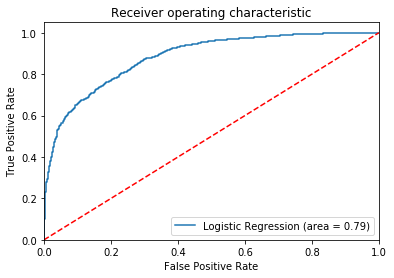

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [0]:
# This is a bad classifier.

In [0]:
# with open('idiot.csv') as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     data = []
#     y = []
#     for row in csv_reader:
#         if line_count != 0:
#             vector = [float(row[3]), float(row[4]), float(row[6]), float(row[7]), int(row[8]), int(row[9]), int(row[10])]
# #             vector = [float(row[6]), float(row[7]), int(row[9])]
#             y.append(int(row[5]))
#             data.append(vector)
#         line_count += 1
    
#     y = np.array(y)
#     data = np.array(data)

train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size=0.35)

In [0]:
score_optimize = 'precision'
param_grid = {'max_depth': np.linspace(1, 10, 10), 'min_samples_split': np.linspace(0.1, 1.0, 10), 'min_samples_leaf': np.linspace(0.1, 0.5, 5)}


In [0]:
from sklearn.model_selection import GridSearchCV
rf = DecisionTreeClassifier()
clf = GridSearchCV(rf, param_grid,cv=5, scoring='%s_macro' % score_optimize, verbose=50)

In [26]:
clf.fit(train_features, train_labels)
# the above line results in the following (commented out) statements
# clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=.2, min_samples_split=.1)
# clf.fit(train_features, train_labels)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.1, score=0.648, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.1, score=0.620, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.1, score=0.627, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=1.0, min_samples_leaf=0.1, min_sampl

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.1, score=0.295, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.1 ......
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.1, score=0.602, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.1 ......
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.1, score=0.590, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.602, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.590, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=1.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.295, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.4 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.602, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.4 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.590, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.5 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.5, score=0.295, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.5 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.5, score=0.295, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.5 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.5, score=0.295, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.5 ......
[CV]  max_depth=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.9, score=0.295, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.9 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.9, score=0.602, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.9 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=0.9, score=0.590, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=1.0, score=0.295, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=1.0, score=0.295, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=2.0, min_samples_leaf=0.5, min_samples_split=1.0, score=0.295, total=   0.0s
[CV] max_depth=2.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.1, score=0.602, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.1 ......
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.1, score=0.590, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.602, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.602, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.590, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=3.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=3.0, min_samples_leaf=0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.1, score=0.590, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.295, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.602, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2 ......
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.2, score=0.590, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.590, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.602, total=   0.0s
[CV] max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=4.0, min_samples_leaf=0.5, min_samples_split=0.700000000000

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.295, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.602, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.590, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.4 ......
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.295, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.4 ......
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.295, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.4 ......
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.295, total=   0.0s
[CV] max_depth=5.0,

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.295, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.8 ......
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.295, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.8 ......
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.602, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.8 ......
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.590, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.9 ......
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.9, score=0.295, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.9 ......
[CV]  max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.9, score=0.295, total=   0.0s
[CV] max_depth=5.0, min_samples_leaf=0.5, min_samples_split=0.9 ......
[CV]  max_depth=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.5, score=0.590, total=   0.0s
[CV] max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.602, total=   0.0s
[CV] max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.590, total=   0.0s
[CV] max_depth=6.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  m

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV] max_depth=6.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=6.0, min_samples_leaf=0.5, min_samples_split=1.0, score=0.590, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1, score=0.682, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1, score=0.671, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1, score=0.665, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1, score=0.676, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1 ......
[CV]  max_depth=7.0, min_samples_leaf=0.1, min_samples_split=0.1, score=0.660, total=   0.0s
[CV] max_depth=7

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.295, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.295, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.295, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.602, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.590, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.4 ......
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.590, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8 ......
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.295, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8 ......
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.295, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8 ......
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.295, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8 ......
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.602, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8 ......
[CV]  max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.590, total=   0.0s
[CV] max_depth=7.0, min_samples_leaf=0.5, min_samples_split=0.9 ......
[

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.295, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.4 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.602, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.4 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.4, score=0.590, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.5 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.5, score=0.295, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.5 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.5, score=0.295, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.5 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.5, score=0.295, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.5 ......
[CV]  max_depth=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.9, score=0.295, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.9 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.9, score=0.602, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.9 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=0.9, score=0.590, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=1.0, score=0.295, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=1.0, score=0.295, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=8.0, min_samples_leaf=0.5, min_samples_split=1.0, score=0.295, total=   0.0s
[CV] max_depth=8.0, min_samples_leaf=0.5, min_samples_split=1.0 ......
[CV]  max_depth=

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.295, total=   0.0s
[CV] max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.602, total=   0.0s
[CV] max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6 ......
[CV]  max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.6, score=0.590, total=   0.0s
[CV] max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001 
[CV]  max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.295, total=   0.0s
[CV] max_depth=9.0, min_samples_leaf=0.5, min_samples_split=0.7

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.295, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.295, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.295, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.602, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004 
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, score=0.590, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.4 .....
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_sam

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classificatio

[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.7000000000000001, score=0.590, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8 .....
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.295, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8 .....
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.295, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8 .....
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.295, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8 .....
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.602, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8 .....
[CV]  max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.8, score=0.590, total=   0.0s
[CV] max_depth=10.0, min_samples_leaf=0.5, min_samples_split=0.9 .

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'min_samples_l

In [27]:
clf.best_params_


{'max_depth': 2.0, 'min_samples_leaf': 0.2, 'min_samples_split': 0.1}

In [28]:
print(len(test_features))

4151


In [29]:
print(clf.score(train_features,train_labels))
print(clf.score(test_features,test_labels))

0.6904286429835113
0.7006724156863822


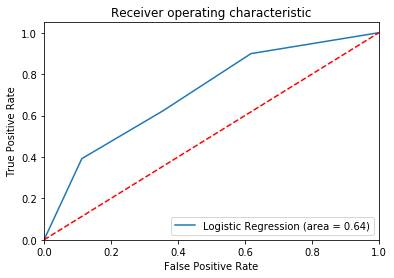

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(test_labels, clf.predict(test_features))
fpr, tpr, thresholds = roc_curve(test_labels, clf.predict_proba(test_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


### The following is Matt's code for the project:

In [0]:
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size=0.35)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(train_features, train_labels)

In [42]:
model.score(test_features, test_labels)

0.772825825102385

In [0]:
from sklearn.neighbors import KNeighborsClassifier
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size=0.35)
model = KNeighborsClassifier(algorithm='auto').fit(train_features, train_labels)

In [44]:
model.score(test_features, test_labels)

0.7231992291014213

In [35]:
# Just to reiterate that we've been using the normalized data
df

,Unnamed: 0,Unnamed: 0.1,away team,away team record,home team,home team record,last game's id,result(away-home),playoff game,away team win pct,home team win pct,point differential,away points,home points,away team ppg,home team ppg,away assists,home assists,away rebounds,home rebounds,away turnovers,home turnovers,away assists per game,home assists per game,away rebounds per game,home rebounds per game,away turnovers per game,home turnovers per game,Home Prev PPG,Away Prev PPG,Home Prev APG,Away Prev APG,Home Prev RPG,Away Prev RPG,Home Prev TPG,Away Prev TPG,Home Team Won,Home Prev Win Percentage,Away Prev Win Percentage,Home Won Last Game,Same Conference,Stadium Size,Scaled Home Prev PPG,Scaled Away Prev PPG,Scaled Home Prev APG,Scaled Away Prev APG,Scaled Home Prev RPG,Scaled Away Prev RPG,Scaled Home Prev TPG,Scaled Away Prev TPG,Scaled Stadium Size
16,16,20800489,Milwaukee Bucks,16-19,Charlotte Bobcats,12-22,20800484,92-102,0,0.457143,0.352941,10,92,102,97.500000,88.500000,15,22,35,32,17,15,15,22.00,35,32.00,17,15.00,88.090909,97.661765,22.0,15.0,32.0,35.0,15.0,17.0,1,0.323529,0.457143,0,1,20200,0.171663,0.369029,0.468085,0.326087,0.444444,0.432099,0.517241,0.607143,0.822963
55,55,20800528,Atlanta Hawks,22-13,Orlando Magic,29-8,20800514,87-121,0,0.628571,0.783784,34,87,121,95.750000,100.800000,16,28,38,54,10,11,16,28.00,38,54.00,10,11.00,100.238889,96.007353,28.0,16.0,54.0,38.0,11.0,10.0,1,0.756757,0.628571,1,1,18846,0.365514,0.335719,0.595745,0.347826,0.750000,0.469136,0.379310,0.357143,0.488642
75,75,20800548,Phoenix Suns,21-13,Los Angeles Clippers,8-29,20800485,109-103,0,0.617647,0.216216,6,109,103,113.250000,92.333333,28,26,41,42,15,16,28,23.00,41,41.00,15,15.00,92.037037,113.378788,26.0,28.0,42.0,41.0,16.0,15.0,0,0.216216,0.588235,0,1,19060,0.234634,0.685479,0.553191,0.608696,0.583333,0.506173,0.551724,0.535714,0.541481
81,81,20800554,Toronto Raptors,16-23,Boston Celtics,31-9,20800546,109-115,0,0.410256,0.775000,6,109,115,99.714286,97.000000,20,26,37,46,11,12,20,26.00,37,46.00,11,12.00,96.538462,99.469925,26.0,20.0,46.0,37.0,12.0,11.0,1,0.750000,0.410256,1,1,18624,0.306465,0.405435,0.553191,0.434783,0.638889,0.456790,0.413793,0.392857,0.433827
105,105,20800578,Cleveland Cavaliers,30-7,Chicago Bulls,18-22,20800476,93-102,0,0.810811,0.450000,9,93,102,99.666667,97.250000,16,22,44,43,16,14,16,22.00,44,43.00,16,14.00,97.128205,99.851852,22.0,16.0,43.0,44.0,14.0,16.0,1,0.425000,0.810811,0,1,20917,0.315876,0.413125,0.468085,0.347826,0.597222,0.543210,0.482759,0.571429,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13902,13902,21900170,Utah Jazz,8-4,Memphis Grizzlies,5-7,21800982,106-107,0,0.666667,0.416667,1,106,107,104.666667,109.750000,17,25,45,46,14,11,17,19.00,45,43.00,14,13.00,110.000000,104.545455,25.0,17.0,46.0,45.0,11.0,14.0,1,0.333333,0.666667,1,1,18119,0.521277,0.507627,0.531915,0.369565,0.638889,0.555556,0.379310,0.500000,0.309136
13903,13903,21900171,Washington Wizards,3-7,Minnesota Timberwolves,7-5,21900080,137-116,0,0.300000,0.583333,21,137,116,117.700000,117.083333,38,26,51,43,13,20,38,25.75,51,43.75,13,16.75,117.181818,115.555556,26.0,38.0,43.0,51.0,20.0,13.0,0,0.583333,0.200000,1,0,19356,0.635880,0.729306,0.553191,0.826087,0.597222,0.629630,0.689655,0.464286,0.614568
13904,13904,21900172,Philadelphia 76ers,7-5,Oklahoma City Thunder,5-7,21800927,119-127,0,0.583333,0.416667,8,119,127,109.416667,107.083333,24,22,43,36,14,13,24,22.90,43,43.80,14,13.50,105.272727,108.545455,22.0,24.0,36.0,43.0,13.0,14.0,1,0.333333,0.583333,0,0,18203,0.445841,0.588164,0.468085,0.521739,0.500000,0.530864,0.448276,0.500000,0.329877
13905,13905,21900173,Boston Celtics,10-1,Golden State Warriors,2-11,21800964,105-100,0,0.909091,0.153846,5,105,100,115.090909,109.461538,24,17,47,55,14,19,24,23.00,47,47.50,14,15.50,110.250000,116.100000,17.0,24.0,55.0,47.0,19.0,14.0,0,0

### My idea for Senior Project: Using two layers of K-Means to FLEX

In [36]:
cols = ['Home Prev PPG','Away Prev PPG', 'Home Prev Win Percentage', 'Away Prev Win Percentage', 'Home Won Last Game' , 'Same Conference' , 'Stadium Size']
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
homeWon = df[df['Home Team Won'] == 1]
homeLost = df[df['Home Team Won'] == 0]
xWon = homeWon[cols]
yWon = homeWon['Home Team Won']
xLost = homeLost[cols]
yLost = homeLost['Home Team Won']
train_featuresWon, test_featuresWon, train_labelsWon, test_labelsWon = train_test_split(xWon, yWon, test_size=0.35)
train_featuresLost, test_featuresLost, train_labelsLost, test_labelsLost = train_test_split(xLost, yLost, test_size=0.35)
kWon = KMeans(n_clusters = 1, random_state = 0, verbose = 0).fit(xWon)
kWonCenters = kWon.cluster_centers_
kWonCount = (Counter(kWon.labels_))
kWonCenters

array([[1.02408182e+02, 1.01494653e+02, 5.13750649e-01, 4.50872334e-01,
        4.96001143e-01, 6.54812911e-01, 1.89933009e+04]])

In [37]:
kWonCount

Counter({0: 7002})

In [38]:
kLost = KMeans(n_clusters = 1, random_state = 0, verbose = 0).fit(xLost)
kLostCenters = kLost.cluster_centers_
kLostCount = (Counter(kLost.labels_))
kLostCenters

array([[1.01073847e+02, 1.02642038e+02, 4.28464414e-01, 5.26013306e-01,
        3.53995058e-01, 6.41268534e-01, 1.90247871e+04]])

In [39]:
kLostCount

Counter({0: 4856})

In [40]:
import math
correct = 0
wrong = 0
for row in test_featuresWon.values:

    wonTemp = 0
    lostTemp = 0    
    for i in range(len(row)):
        t = row[i]
        u = kWonCenters[0][i]
        o = kLostCenters[0][i]
        wonTemp += ((t - u)**2)
        lostTemp +=  ((t - o)**2)
    wonDist = math.sqrt(wonTemp)
    lostDist = math.sqrt(lostTemp)
    if wonDist < lostDist:
        correct += 1
    else:
        wrong += 1
print(correct, wrong)
# This was a SMALL BRAIN idea

1144 1307
